In [1]:
import pandas as pd # To work with dataframes
import numpy as np # To Perform numerical operations
import seaborn as sns #To visualize data
from sklearn.model_selection import train_test_split #To Partition the data
from sklearn.linear_model import LogisticRegression #Importing Library for Logistic regression
from sklearn.metrics import accuracy_score,confusion_matrix #Importing Performance matrix

In [2]:
data_income = pd.read_csv("income.csv")

##### Creating a copy of the data

In [3]:
data = data_income.copy()

#### Data Pre-processing - Missing values

In [4]:
data.info() #To get the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [5]:
data.isnull() #Check for missing values

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,False,False,False,False,False,False,False,False,False,False,False,False,False
31974,False,False,False,False,False,False,False,False,False,False,False,False,False
31975,False,False,False,False,False,False,False,False,False,False,False,False,False
31976,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().sum() #Get sum of missing values

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [7]:
summary_num = data.describe() #gives the mean, std, and min, max values

In [8]:
summary_num

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [9]:
summary_cate = data.describe(include="O") #includes objects

In [10]:
summary_cate #gives unique, most frequently occuring category etc

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


### Get all the Unique categories using value_counts

In [11]:
data['JobType'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [12]:
data['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [13]:
np.unique(data['JobType']) #here we see there is space before question mark. np.unique gives unique categories

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [14]:
np.unique(data['occupation'])

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

In [15]:
data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [16]:
data = pd.read_csv("income.csv",na_values=[' ?'])

In [17]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

### Check if in a particular row either one of the column value is missing or both are missing under Job type and Occupation. lets subset the row with atleast one column missing in a row. axis=1 gives atleast one missing column.

In [18]:
missing = data[data.isnull().any(axis=1)]

In [19]:
missing

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


### We see that it has converted all " ?" values to nan. But we found some datasets(7 Nos) wehere the Jobtype is Never Worked and therefore occupation is given as nan.

## Drop rows with missing values

In [20]:
data2 = data.dropna(axis=0)

In [21]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30162 non-null  int64 
 1   JobType        30162 non-null  object
 2   EdType         30162 non-null  object
 3   maritalstatus  30162 non-null  object
 4   occupation     30162 non-null  object
 5   relationship   30162 non-null  object
 6   race           30162 non-null  object
 7   gender         30162 non-null  object
 8   capitalgain    30162 non-null  int64 
 9   capitalloss    30162 non-null  int64 
 10  hoursperweek   30162 non-null  int64 
 11  nativecountry  30162 non-null  object
 12  SalStat        30162 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [22]:
correlation = data2.corr() #Find out correlation between variables.

In [23]:
correlation #only showing correlation betwen numerical variables

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


Shows none of the variables are correlated.

### Now we will consider categorical variables

### The pandas crosstab function builds a cross-tabulation table that can show the frequency with which certain groups of data appear

In [24]:
#gender proportion table
gender = pd.crosstab(index=data2['gender'],columns='count',normalize=True)
gender

col_0,count
gender,
Female,0.324315
Male,0.675685


### gender vs Salary Stat. Rows =Gender and Columns = Salary

In [25]:
gender_salstat = pd.crosstab(index=data2['gender'],columns=data2['SalStat'],normalize='index',margins=True)

In [26]:
gender_salstat

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


#### By setting normalize='index' we get row proportion=1

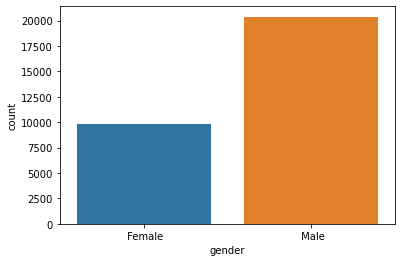

In [27]:
Salstat = sns.countplot(x=data2['gender'])

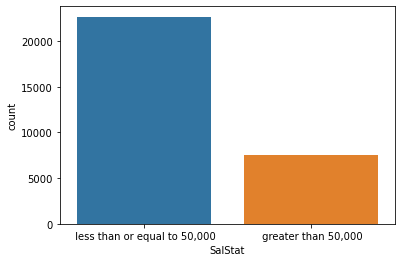

In [28]:
Salstat = sns.countplot(x=data2['SalStat'])

### Histogram of Age

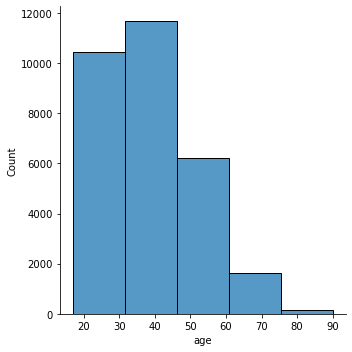

In [29]:
sns.displot(x=data2['age'],bins=5,kde=False)

### Box Plot - Age vs Salary Status

<AxesSubplot:xlabel='SalStat', ylabel='age'>

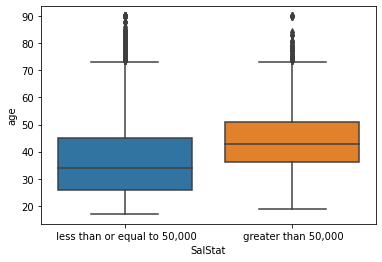

In [30]:
sns.boxplot(x='SalStat',y='age',data=data2)

In [31]:
data2.groupby('SalStat')['age'].median()

SalStat
 greater than 50,000             43
 less than or equal to 50,000    34
Name: age, dtype: int64

In [32]:
data2

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


### People with 35 to 50 Age group are more likely to earn > 50000
### People with 25 to 34 Age group are more likely to earn < 50000

# Logisitc regression

### Reindexing the salary status names to 0,1 Because machine Learning data cannot work with categorical data directly. So categorical data must be converted to numbers.

In [33]:
data2['SalStat'] = data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})


<ipython-input-33-0016e0dd37ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat'] = data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})


In [34]:
data2

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,0
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,0
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,0
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,0


In [35]:
data2['SalStat'] = data2['SalStat'].replace(np.nan, 0)

<ipython-input-35-55799ab2abbb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat'] = data2['SalStat'].replace(np.nan, 0)


In [36]:
data2.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [37]:
new_data = pd.get_dummies(data2,drop_first=True)

## Storing the Column names

In [38]:
column_list = list(new_data.columns)

In [39]:
column_list

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStat',
 'JobType_ Local-gov',
 'JobType_ Private',
 'JobType_ Self-emp-inc',
 'JobType_ Self-emp-not-inc',
 'JobType_ State-gov',
 'JobType_ Without-pay',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Pr

### Separating the input names from data

In [40]:
features = list(set(column_list) - set(['SalStat']))

In [41]:
features

['nativecountry_ United-States',
 'EdType_ Doctorate',
 'nativecountry_ Portugal',
 'capitalgain',
 'maritalstatus_ Married-civ-spouse',
 'EdType_ 11th',
 'JobType_ Local-gov',
 'nativecountry_ Thailand',
 'nativecountry_ China',
 'nativecountry_ Jamaica',
 'nativecountry_ Dominican-Republic',
 'nativecountry_ Vietnam',
 'nativecountry_ Cuba',
 'nativecountry_ Trinadad&Tobago',
 'EdType_ Bachelors',
 'occupation_ Farming-fishing',
 'occupation_ Sales',
 'occupation_ Exec-managerial',
 'nativecountry_ Taiwan',
 'nativecountry_ Poland',
 'relationship_ Other-relative',
 'nativecountry_ Nicaragua',
 'race_ Asian-Pac-Islander',
 'nativecountry_ Ireland',
 'capitalloss',
 'EdType_ Assoc-acdm',
 'occupation_ Machine-op-inspct',
 'nativecountry_ Honduras',
 'maritalstatus_ Married-spouse-absent',
 'nativecountry_ France',
 'nativecountry_ El-Salvador',
 'JobType_ Self-emp-not-inc',
 'EdType_ 1st-4th',
 'EdType_ Some-college',
 'relationship_ Wife',
 'occupation_ Transport-moving',
 'nativecou

### storing the output values in y

In [42]:
y=new_data['SalStat'].values

In [43]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

### Storing the values from input features. For features dont use single quotes new_data['features'] else you will get error KeyError: 'features'. just use new_data[features].values

In [44]:
x= new_data[features].values

In [45]:
x.ndim

2

### Splitting the data into train and test

In [46]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3,random_state=0)

#####  test_size decides what proportion will be test data and random_state=0 means same set of samples will be chosen, if not given then different set of samples will be chosen.

### Make an instance of the Model

In [47]:
logistic = LogisticRegression()

Fitting the values for x and y

In [48]:
logistic.fit(train_x,train_y)

C:\Users\Amit\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()